#  TensorFlowを用いた犬猫認識アプリ

Kaggleコンペ(https://www.kaggle.com/c/dogs-vs-cats)　からデータセットをダウンロード

In [1]:
!unzip "drive/MyDrive/portfolio/dogs_vs_cats/dogs-vs-cats.zip"

Archive:  drive/MyDrive/portfolio/dogs_vs_cats/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [2]:
ls

drive/  sample_data/  sampleSubmission.csv  test1.zip  train.zip


In [3]:
!unzip train.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train

In [4]:
!unzip test1.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1

In [5]:
ls train/

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [6]:
ls test1/

10000.jpg  11609.jpg  1966.jpg  3573.jpg  5180.jpg  6789.jpg  8396.jpg
10001.jpg  1160.jpg   1967.jpg  3574.jpg  5181.jpg  678.jpg   8397.jpg
10002.jpg  11610.jpg  1968.jpg  3575.jpg  5182.jpg  6790.jpg  8398.jpg
10003.jpg  11611.jpg  1969.jpg  3576.jpg  5183.jpg  6791.jpg  8399.jpg
10004.jpg  11612.jpg  196.jpg   3577.jpg  5184.jpg  6792.jpg  839.jpg
10005.jpg  11613.jpg  1970.jpg  3578.jpg  5185.jpg  6793.jpg  83.jpg
10006.jpg  11614.jpg  1971.jpg  3579.jpg  5186.jpg  6794.jpg  8400.jpg
10007.jpg  11615.jpg  1972.jpg  357.jpg   5187.jpg  6795.jpg  8401.jpg
10008.jpg  11616.jpg  1973.jpg  3580.jpg  5188.jpg  6796.jpg  8402.jpg
10009.jpg  11617.jpg  1974.jpg  3581.jpg  5189.jpg  6797.jpg  8403.jpg
1000.jpg   11618.jpg  1975.jpg  3582.jpg  518.jpg   6798.jpg  8404.jpg
10010.jpg  11619.jpg  1976.jpg  3583.jpg  5190.jpg  6799.jpg  8405.jpg
10011.jpg  1161.jpg   1977.jpg  3584.jpg  5191.jpg  679.jpg   8406.jpg
10012.jpg  11620.jpg  1978.jpg  3585.jpg  5192.jpg  67.jpg    8407.jpg
10013.jpg

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.4.0


In [8]:
import keras

学習データの確認

Opencv2を用いて画像を出力

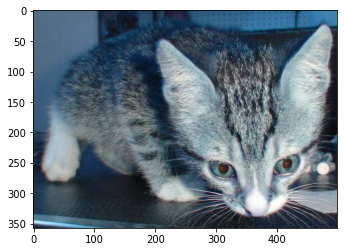

In [9]:
import cv2

train_img = cv2.imread('train/cat.300.jpg')
plt.imshow(train_img)
plt.show()

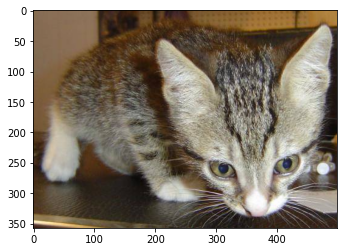

In [10]:
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
plt.imshow(train_img)
plt.show()

検証データの確認

PILを用いて画像を出力

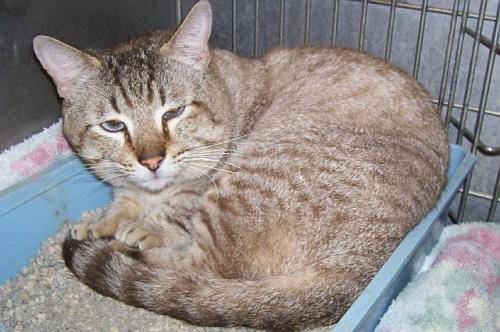

In [11]:
from PIL import Image

test_img = 'test1/300.jpg'
Image.open(test_img)

学習データに猫の画像と犬の画像が一緒に含まれているため、分ける必要がある。

学習データの猫と犬の画像を分ける

In [12]:
ls

drive/        sampleSubmission.csv  test1.zip  train.zip
sample_data/  test1/                train/


まず、猫の画像名を取得し、リストに保存する

In [13]:
import os

filepath_cats_list = []
files = os.listdir('train/')
# 猫の画像を取得
for file in files:
  if 'cat' in file:
    filepath_cats_list.append(file)

リストの中身と量を確認する

In [14]:
print('猫の画像リスト:', filepath_cats_list)
print('データ数:', len(filepath_cats_list))

猫の画像リスト: ['cat.7099.jpg', 'cat.2288.jpg', 'cat.8293.jpg', 'cat.4169.jpg', 'cat.1446.jpg', 'cat.1866.jpg', 'cat.7704.jpg', 'cat.9931.jpg', 'cat.8614.jpg', 'cat.12424.jpg', 'cat.11798.jpg', 'cat.10810.jpg', 'cat.6334.jpg', 'cat.4027.jpg', 'cat.10691.jpg', 'cat.6206.jpg', 'cat.1008.jpg', 'cat.10560.jpg', 'cat.3037.jpg', 'cat.4938.jpg', 'cat.8343.jpg', 'cat.4277.jpg', 'cat.10669.jpg', 'cat.7281.jpg', 'cat.10600.jpg', 'cat.1333.jpg', 'cat.490.jpg', 'cat.9423.jpg', 'cat.860.jpg', 'cat.6746.jpg', 'cat.8072.jpg', 'cat.5831.jpg', 'cat.2171.jpg', 'cat.11651.jpg', 'cat.3550.jpg', 'cat.9202.jpg', 'cat.6790.jpg', 'cat.10665.jpg', 'cat.11735.jpg', 'cat.7001.jpg', 'cat.6558.jpg', 'cat.1800.jpg', 'cat.11781.jpg', 'cat.10783.jpg', 'cat.11020.jpg', 'cat.6086.jpg', 'cat.2715.jpg', 'cat.3262.jpg', 'cat.9032.jpg', 'cat.8030.jpg', 'cat.4756.jpg', 'cat.2338.jpg', 'cat.8114.jpg', 'cat.3858.jpg', 'cat.2353.jpg', 'cat.1213.jpg', 'cat.4025.jpg', 'cat.7408.jpg', 'cat.8728.jpg', 'cat.8331.jpg', 'cat.2749.jpg', 'ca

犬の画像データも同様に行う

In [15]:
import os

filepath_dogs_list = []
files = os.listdir('train/')
# 犬の画像を取得
for file in files:
  if 'dog' in file:
    filepath_dogs_list.append(file)

リストの中身と量を確認する

In [16]:
print('犬の画像リスト:', filepath_dogs_list)
print('データ数:', len(filepath_dogs_list))

犬の画像リスト: ['dog.6142.jpg', 'dog.2512.jpg', 'dog.9800.jpg', 'dog.9910.jpg', 'dog.9712.jpg', 'dog.4440.jpg', 'dog.6710.jpg', 'dog.9843.jpg', 'dog.7134.jpg', 'dog.7338.jpg', 'dog.589.jpg', 'dog.2347.jpg', 'dog.11436.jpg', 'dog.11360.jpg', 'dog.1457.jpg', 'dog.4575.jpg', 'dog.3620.jpg', 'dog.8891.jpg', 'dog.6642.jpg', 'dog.454.jpg', 'dog.5308.jpg', 'dog.11871.jpg', 'dog.6675.jpg', 'dog.5472.jpg', 'dog.9803.jpg', 'dog.3550.jpg', 'dog.1121.jpg', 'dog.10708.jpg', 'dog.11915.jpg', 'dog.6829.jpg', 'dog.12065.jpg', 'dog.6793.jpg', 'dog.2462.jpg', 'dog.11363.jpg', 'dog.171.jpg', 'dog.8624.jpg', 'dog.6221.jpg', 'dog.12483.jpg', 'dog.6646.jpg', 'dog.1810.jpg', 'dog.10714.jpg', 'dog.1665.jpg', 'dog.1830.jpg', 'dog.11750.jpg', 'dog.2000.jpg', 'dog.2884.jpg', 'dog.7324.jpg', 'dog.3648.jpg', 'dog.9878.jpg', 'dog.4971.jpg', 'dog.7174.jpg', 'dog.11984.jpg', 'dog.1514.jpg', 'dog.10783.jpg', 'dog.1915.jpg', 'dog.9860.jpg', 'dog.6956.jpg', 'dog.9582.jpg', 'dog.6172.jpg', 'dog.9440.jpg', 'dog.2369.jpg', 'dog.

データを毎回ランダムにディープラーニングすると結果が毎回変わり精度が落ちるので、固定するために、データを昇順に並び替える

リスト内の数字の並び替えは、sort関数を使うが、10は5よりも小さいと見なされてしまう。

これを避けるために、さらにこれが”文字列”番号であるため、正規表現を用いる。

In [17]:
import re

print('ソート前：{}'.format(filepath_cats_list))
filepath_cats_list.sort(key=lambda s: int(re.search(r'\d+', s).group()))
print('ソート後(昇順)：{}'.format(filepath_cats_list))

ソート前：['cat.7099.jpg', 'cat.2288.jpg', 'cat.8293.jpg', 'cat.4169.jpg', 'cat.1446.jpg', 'cat.1866.jpg', 'cat.7704.jpg', 'cat.9931.jpg', 'cat.8614.jpg', 'cat.12424.jpg', 'cat.11798.jpg', 'cat.10810.jpg', 'cat.6334.jpg', 'cat.4027.jpg', 'cat.10691.jpg', 'cat.6206.jpg', 'cat.1008.jpg', 'cat.10560.jpg', 'cat.3037.jpg', 'cat.4938.jpg', 'cat.8343.jpg', 'cat.4277.jpg', 'cat.10669.jpg', 'cat.7281.jpg', 'cat.10600.jpg', 'cat.1333.jpg', 'cat.490.jpg', 'cat.9423.jpg', 'cat.860.jpg', 'cat.6746.jpg', 'cat.8072.jpg', 'cat.5831.jpg', 'cat.2171.jpg', 'cat.11651.jpg', 'cat.3550.jpg', 'cat.9202.jpg', 'cat.6790.jpg', 'cat.10665.jpg', 'cat.11735.jpg', 'cat.7001.jpg', 'cat.6558.jpg', 'cat.1800.jpg', 'cat.11781.jpg', 'cat.10783.jpg', 'cat.11020.jpg', 'cat.6086.jpg', 'cat.2715.jpg', 'cat.3262.jpg', 'cat.9032.jpg', 'cat.8030.jpg', 'cat.4756.jpg', 'cat.2338.jpg', 'cat.8114.jpg', 'cat.3858.jpg', 'cat.2353.jpg', 'cat.1213.jpg', 'cat.4025.jpg', 'cat.7408.jpg', 'cat.8728.jpg', 'cat.8331.jpg', 'cat.2749.jpg', 'cat.33

同様の作業を犬の画像でも行う

In [18]:
import re

print('ソート前：{}'.format(filepath_dogs_list))
filepath_dogs_list.sort(key=lambda s: int(re.search(r'\d+', s).group()))
print('ソート後(昇順)：{}'.format(filepath_dogs_list))

ソート前：['dog.6142.jpg', 'dog.2512.jpg', 'dog.9800.jpg', 'dog.9910.jpg', 'dog.9712.jpg', 'dog.4440.jpg', 'dog.6710.jpg', 'dog.9843.jpg', 'dog.7134.jpg', 'dog.7338.jpg', 'dog.589.jpg', 'dog.2347.jpg', 'dog.11436.jpg', 'dog.11360.jpg', 'dog.1457.jpg', 'dog.4575.jpg', 'dog.3620.jpg', 'dog.8891.jpg', 'dog.6642.jpg', 'dog.454.jpg', 'dog.5308.jpg', 'dog.11871.jpg', 'dog.6675.jpg', 'dog.5472.jpg', 'dog.9803.jpg', 'dog.3550.jpg', 'dog.1121.jpg', 'dog.10708.jpg', 'dog.11915.jpg', 'dog.6829.jpg', 'dog.12065.jpg', 'dog.6793.jpg', 'dog.2462.jpg', 'dog.11363.jpg', 'dog.171.jpg', 'dog.8624.jpg', 'dog.6221.jpg', 'dog.12483.jpg', 'dog.6646.jpg', 'dog.1810.jpg', 'dog.10714.jpg', 'dog.1665.jpg', 'dog.1830.jpg', 'dog.11750.jpg', 'dog.2000.jpg', 'dog.2884.jpg', 'dog.7324.jpg', 'dog.3648.jpg', 'dog.9878.jpg', 'dog.4971.jpg', 'dog.7174.jpg', 'dog.11984.jpg', 'dog.1514.jpg', 'dog.10783.jpg', 'dog.1915.jpg', 'dog.9860.jpg', 'dog.6956.jpg', 'dog.9582.jpg', 'dog.6172.jpg', 'dog.9440.jpg', 'dog.2369.jpg', 'dog.3290

犬猫画像データを学習データと検証データに分ける

train(dogs+cats)のデータ数が12500+12500=25000

trainデータを学習用と検証用に分けたい。

test1のデータ数が12500あるので、学習用データ数をtest1と合わせて12500、残り12500を検証用にする

In [19]:
# catsのデータ数が12500、dogsのデータ数も12500あるので0~6249までを学習用、6250~125000までを検証用にする
train_cats_length = len(filepath_cats_list) // 2

# 学習データ猫の画像
train_cats_img = filepath_cats_list[0:train_cats_length]
# 検証データ猫の画像
test_cats_img = filepath_cats_list[train_cats_length:len(filepath_cats_list)]
# 学習データ犬の画像(猫のデータ数と同じなので、train_cats_length使う)
train_dogs_img = filepath_dogs_list[0:train_cats_length]
# 検証データ犬の画像
test_dogs_img = filepath_dogs_list[train_cats_length:len(filepath_cats_list)]

print('猫の学習データ:', train_cats_img)
print('猫の学習データ数:', len(train_cats_img))
print('犬の検証データ:', test_dogs_img)
print('犬の検証データ数:', len(test_dogs_img))

猫の学習データ: ['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.50.jpg', 'cat.51.jpg', 'cat.52.jpg', 'cat.53.jpg', 'cat.54.jpg', 'cat.55.jpg', 'cat.56.jpg', 'cat.57.jpg', 'cat.58.jpg', 'cat.59.jpg', 'cat.60.jpg', 'cat.61.jpg', 'cat.62.jpg', 'cat.63.jpg', 'cat.64.jpg', 'cat.65.jpg', 'cat.66.jpg', 'cat.67.jpg', 'cat.68.jpg', 'cat.69.jpg', 'cat.70.jpg', 'cat.7

trainディレクトリとtestディレクトリを作成


In [20]:
import os

train_cats_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train'

os.mkdir(train_cats_dir_path)

In [21]:
import os

test_cats_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/test'

os.mkdir(test_cats_dir_path)

学習用および検証用ディレクトリを作成する
(一度作成した後にもう一度コードを実行するとエラーが返される)

In [22]:
# 学習用猫の画像データのファイルを作成する
import os

train_cats_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_cats'

os.mkdir(train_cats_dir_path)

In [23]:
# 検証用猫の画像データのファイルを作成する
import os

test_cats_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/test/test_cats'

os.mkdir(test_cats_dir_path)

trainデータに存在する猫の画像をtrain_catsディレクトリに移動する

In [24]:
# 猫の画像データをtrain_catsファイルに移動
import shutil

for file in train_cats_img:
  path = os.path.join('train/', file)
  new_path = shutil.move(path, train_cats_dir_path)

trainデータに存在する猫の画像をtest_catsディレクトリに移動する

In [25]:
# 猫の画像データをtest_catsファイルに移動
import shutil

for file in test_cats_img:
  path = os.path.join('train/', file)
  new_path = shutil.move(path, test_cats_dir_path)

移動できたか確認する

In [26]:
# 猫の学習用データ数の確認
files = os.listdir(train_cats_dir_path)
print(len(files))

6250


In [27]:
ls /content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_cats/

cat.0.jpg     cat.2125.jpg  cat.3250.jpg  cat.4376.jpg  cat.5500.jpg
cat.1000.jpg  cat.2126.jpg  cat.3251.jpg  cat.4377.jpg  cat.5501.jpg
cat.1001.jpg  cat.2127.jpg  cat.3252.jpg  cat.4378.jpg  cat.5502.jpg
cat.1002.jpg  cat.2128.jpg  cat.3253.jpg  cat.4379.jpg  cat.5503.jpg
cat.1003.jpg  cat.2129.jpg  cat.3254.jpg  cat.437.jpg   cat.5504.jpg
cat.1004.jpg  cat.212.jpg   cat.3255.jpg  cat.4380.jpg  cat.5505.jpg
cat.1005.jpg  cat.2130.jpg  cat.3256.jpg  cat.4381.jpg  cat.5506.jpg
cat.1006.jpg  cat.2131.jpg  cat.3257.jpg  cat.4382.jpg  cat.5507.jpg
cat.1007.jpg  cat.2132.jpg  cat.3258.jpg  cat.4383.jpg  cat.5508.jpg
cat.1008.jpg  cat.2133.jpg  cat.3259.jpg  cat.4384.jpg  cat.5509.jpg
cat.1009.jpg  cat.2134.jpg  cat.325.jpg   cat.4385.jpg  cat.550.jpg
cat.100.jpg   cat.2135.jpg  cat.3260.jpg  cat.4386.jpg  cat.5510.jpg
cat.1010.jpg  cat.2136.jpg  cat.3261.jpg  cat.4387.jpg  cat.5511.jpg
cat.1011.jpg  cat.2137.jpg  cat.3262.jpg  cat.4388.jpg  cat.5512.jpg
cat.1012.jpg  cat.2138.jpg  cat.326

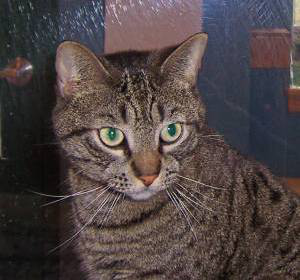

In [28]:
from PIL import Image

cats_img = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_cats/cat.1.jpg'
Image.open(cats_img)

同様に犬の画像データも学習用と検証用に分ける

In [29]:
# 学習用犬の画像データのファイルを作成する
import os

train_dogs_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs'

os.mkdir(train_dogs_dir_path)

In [30]:
# 検証用犬の画像データのファイルを作成する
import os

test_dogs_dir_path = '/content/drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs'

os.mkdir(test_dogs_dir_path)

In [31]:
# 犬の画像データをtrain_dogsファイルに移動
import shutil

for file in train_dogs_img:
  path = os.path.join('train/', file)
  new_path = shutil.move(path, train_dogs_dir_path)

In [32]:
# 犬の画像データをtest_dogsファイルに移動
import shutil

for file in test_dogs_img:
  path = os.path.join('train/', file)
  new_path = shutil.move(path, test_dogs_dir_path)

確認

In [33]:
# 犬の検証用データ数の確認
files = os.listdir(test_dogs_dir_path)
print(len(files))

6250


In [34]:
ls /content/drive/MyDrive/portfolio/dogs_vs_cats/test/test_dogs/

dog.10000.jpg  dog.11250.jpg  dog.6250.jpg  dog.7500.jpg  dog.8750.jpg
dog.10001.jpg  dog.11251.jpg  dog.6251.jpg  dog.7501.jpg  dog.8751.jpg
dog.10002.jpg  dog.11252.jpg  dog.6252.jpg  dog.7502.jpg  dog.8752.jpg
dog.10003.jpg  dog.11253.jpg  dog.6253.jpg  dog.7503.jpg  dog.8753.jpg
dog.10004.jpg  dog.11254.jpg  dog.6254.jpg  dog.7504.jpg  dog.8754.jpg
dog.10005.jpg  dog.11255.jpg  dog.6255.jpg  dog.7505.jpg  dog.8755.jpg
dog.10006.jpg  dog.11256.jpg  dog.6256.jpg  dog.7506.jpg  dog.8756.jpg
dog.10007.jpg  dog.11257.jpg  dog.6257.jpg  dog.7507.jpg  dog.8757.jpg
dog.10008.jpg  dog.11258.jpg  dog.6258.jpg  dog.7508.jpg  dog.8758.jpg
dog.10009.jpg  dog.11259.jpg  dog.6259.jpg  dog.7509.jpg  dog.8759.jpg
dog.10010.jpg  dog.11260.jpg  dog.6260.jpg  dog.7510.jpg  dog.8760.jpg
dog.10011.jpg  dog.11261.jpg  dog.6261.jpg  dog.7511.jpg  dog.8761.jpg
dog.10012.jpg  dog.11262.jpg  dog.6262.jpg  dog.7512.jpg  dog.8762.jpg
dog.10013.jpg  dog.11263.jpg  dog.6263.jpg  dog.7513.jpg  dog.8763.jpg
dog.10

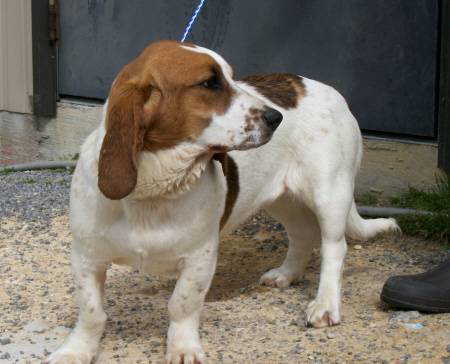

In [35]:
from PIL import Image

dogs_img = '/content/drive/MyDrive/portfolio/dogs_vs_cats/train/train_dogs/dog.300.jpg'
Image.open(dogs_img)

train_cats、test_catsファイルをzipで保存し、ローカルにダウンロード

In [36]:
import shutil

# 学習データ
shutil.make_archive('/content/drive/MyDrive/portfolio/dogs_vs_cats/train', 'zip',
                    root_dir='/content/drive/MyDrive/portfolio/dogs_vs_cats/', base_dir='train')

'/content/drive/MyDrive/portfolio/dogs_vs_cats/train.zip'

In [37]:
from google.colab import files
files.download('/content/drive/MyDrive/portfolio/dogs_vs_cats/train.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import shutil

# 検証データ
shutil.make_archive('/content/drive/MyDrive/portfolio/dogs_vs_cats/test', 'zip', 
                    root_dir='/content/drive/MyDrive/portfolio/dogs_vs_cats/', base_dir='test')

'/content/drive/MyDrive/portfolio/dogs_vs_cats/test.zip'

In [39]:
from google.colab import files
files.download('/content/drive/MyDrive/portfolio/dogs_vs_cats/test.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>